# ALGORITMO GENÉTICO PARA MINIMIZAR A FUNÇÃO ACKLEY

![](ackley.jpg)

Será feita a minimização para a função no espaço bidimensional. O código pode ser expandido para mais dimensões.

Cada cromossomo terá n bits que serão divididos em intervalos iguais para as duas variáveis.

A normalização para o intervalo (-5, 5) será da seguinte forma:

![](norm.jpg)

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Gera indivíduo

In [2]:
def cromossomo(tamanho_crom):
    cromossomo = []
    for i in range(tamanho_crom):
        if random.random() < 0.5:
            cromossomo.append("0")
        else:
            cromossomo.append("1")
        
    return cromossomo

In [3]:
print(cromossomo(16))

['0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1']


Gera população

In [4]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [5]:
gerar_populacao(10, 10)

[['0', '0', '1', '0', '0', '0', '0', '1', '1', '0'],
 ['0', '1', '0', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1', '1', '1', '1', '0', '0', '1', '1'],
 ['1', '0', '1', '0', '0', '0', '1', '1', '0', '1'],
 ['1', '1', '1', '0', '0', '1', '0', '0', '0', '1'],
 ['0', '0', '0', '1', '1', '1', '1', '0', '0', '1'],
 ['1', '1', '1', '1', '1', '1', '1', '1', '0', '1'],
 ['1', '1', '1', '1', '0', '1', '1', '1', '1', '0'],
 ['0', '1', '1', '1', '0', '1', '1', '1', '1', '1'],
 ['1', '1', '1', '0', '1', '0', '0', '1', '0', '1']]

Divide o cromossomo

In [6]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [7]:
variaveis(cromossomo(10), 5)

[['1', '0', '0', '0', '1'], ['0', '0', '0', '1', '1']]

Convertendo a variável para decimal

In [8]:
def converte_para_decimal(variaveis):
    convertidos = []

    for i in variaveis:
        variavel_concatenada = ''.join(i)
        convertidos.append(int(variavel_concatenada, 2))

    return convertidos


In [9]:
c = cromossomo(10)
print(c)
converte_para_decimal(variaveis(c, 5))

['0', '0', '1', '0', '0', '1', '1', '1', '0', '1']


[4, 29]

Normalização

In [10]:
def normaliza(cromossomo, max_val,min_val, tam_subgrupo):
    subgrupos = variaveis(cromossomo, tam_subgrupo)
    convertidos = converte_para_decimal(subgrupos)
    num_possible_values = 2**tam_subgrupo - 1
    valores_mapeados = []

    # Mapeia o valor decimal para o intervalo [-5, 5]
    for _, valor in enumerate(convertidos):
        valores_mapeados.append(min_val + (valor / num_possible_values) * (max_val - min_val))

    return np.array(valores_mapeados)
    

In [11]:
c = cromossomo(10)
print(c)
normaliza(c, 5, -5, 5)


['0', '1', '1', '1', '1', '0', '1', '0', '0', '0']


array([-0.16129032, -2.41935484])

In [12]:
c = ['0'] * 10
print(c)
normaliza(c, 5, -5, 5)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


array([-5., -5.])

Fitness

In [13]:
def fitness(x):
    
    n = len(x)
    
    # Cálculo da função de Ackley para n variáveis
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2 * np.pi * x))
    
    term1 = -20 * np.exp(-0.2 * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    
    resultado = term1 + term2 + 20 + np.e
    
    return resultado 

In [14]:
fitness(normaliza(c, 5, -5, 5))

12.642411176571153

Seleciona o melhor indivíduo

In [15]:
def seleciona_melhor(populacao, max_val, min_val, tam_subgrupo):
    melhor_cromosomo = populacao[0]
    menor_valor = fitness(normaliza(melhor_cromosomo, max_val, min_val, tam_subgrupo))
    for i in range(1, len(populacao)):
        valor_atual = fitness(normaliza(populacao[i], max_val, min_val, tam_subgrupo))
        if menor_valor > valor_atual:
            melhor_cromosomo = populacao[i]
            menor_valor = valor_atual

    return menor_valor, melhor_cromosomo

In [16]:
seleciona_melhor(gerar_populacao(10, 10), 5, -5, 5)

(5.767286507196292, ['1', '0', '0', '0', '0', '1', '0', '1', '0', '1'])

Seleção dos pais pela roleta viciada

In [17]:
def soma_avaliacoes(populacao, max_val, min_val, tam_subgrupo):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += (1 / fitness(normaliza(individuo, max_val, min_val, tam_subgrupo))) # Realizando soma inversa para valorizar os menores resultados
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao, max_val, min_val, tam_subgrupo):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    
    while i < len(populacao) and soma < valor_sorteado:
        soma += (1 / fitness(normaliza(populacao[i], max_val, min_val, tam_subgrupo)))
        pai += 1
        i += 1
    return pai
    

Crossover

In [18]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = pai2[0:ponto_crossover] + pai1[ponto_crossover:]

    return filho


Mutação

In [19]:
def mutacao(cromossomo, taxa_mutacao):
    for i in range(len(cromossomo)):
        if random.random() < taxa_mutacao:
            if cromossomo[i] == '1':
                cromossomo[i] = '0'
            else:
                cromossomo[i] = '1'

    return cromossomo

Restaurando o tamanho da população

In [20]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avalicao, tam_subgrupo, max_val, min_val):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    # nova_populacao = elitismo(populacao, nMelhores)

    nova_populacao = []

    while len(nova_populacao) < len(populacao):
        pai1 = seleciona_pai(soma_avalicao, populacao, max_val, min_val, tam_subgrupo)
        pai2 = seleciona_pai(soma_avalicao, populacao, max_val, min_val, tam_subgrupo)
        novo_cromo = crossover(populacao[pai1], populacao[pai2])
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao

### EXECUÇÃO DO ALGORITMO

In [21]:
def alg_genetico(geracoes, tamanho_pop, tamanho_crom, taxa_mutacao, max_val, min_val, tam_subgrupo):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,tamanho_crom) # Criando cromossomos
    melhores.append(seleciona_melhor(pop, max_val, min_val, tam_subgrupo))
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop, max_val, min_val, tam_subgrupo)
        nova_pop = nova_populacao(pop, taxa_mutacao, round(tamanho_pop*0.15), soma_avaliacao, tam_subgrupo, max_val, min_val)
        melhores.append(seleciona_melhor(nova_pop, max_val, min_val, tam_subgrupo))
        pop = nova_pop
    
    return melhores

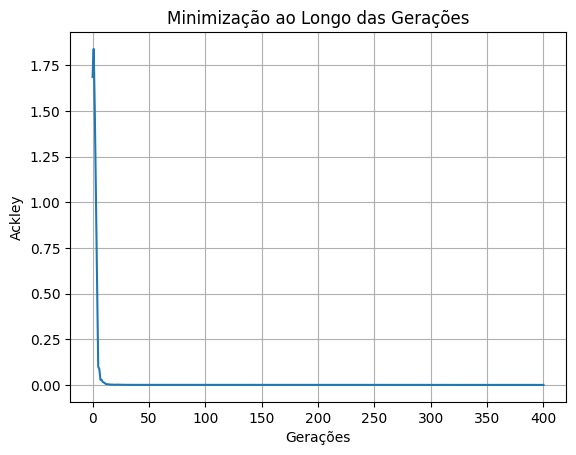

In [22]:
# Execução do algoritmo
melhores = alg_genetico(400, 50, 40, 0.05, 5, -5, 20)

# Extração dos valores de lucro dos melhores cromossomos
funcao = [funcao for funcao, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(funcao)
plt.xlabel('Gerações')
plt.ylabel('Ackley')
plt.title('Minimização ao Longo das Gerações')
plt.grid(True)
plt.show()

In [23]:
minimo = min(melhores)
min_funcao = minimo[0]
print(min_funcao)
min_crom = minimo[1]
print(min_crom)
normaliza(min_crom, 5, -5, 20)


1.9074715439604262e-05
['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


array([4.76837613e-06, 4.76837613e-06])

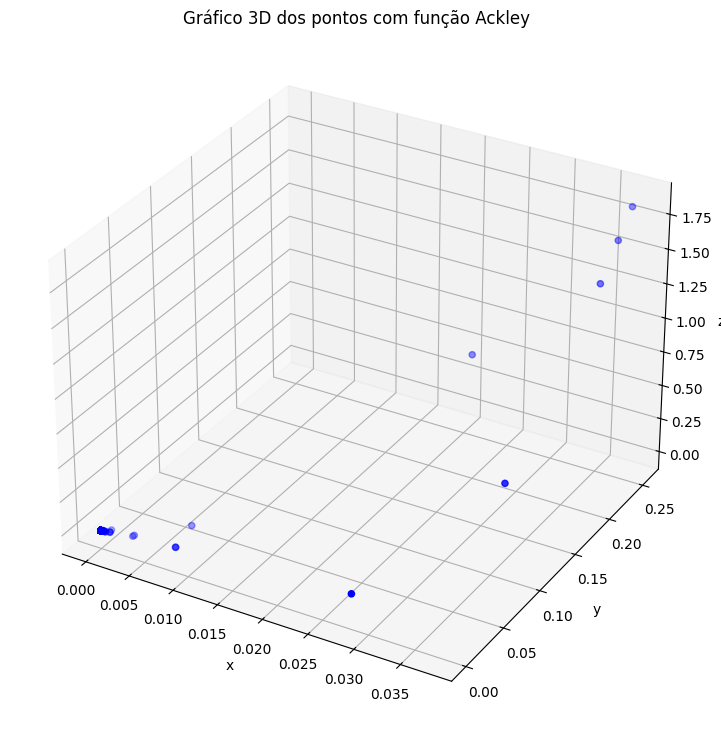

In [24]:
from mpl_toolkits.mplot3d import Axes3D

melhores.sort()
funcao.sort()
valores_x1 = [] 
valores_x2 = [] 
for func, crom in melhores:
    valores = normaliza(crom, 5, -5, 20)
    valores_x1.append(valores[0])
    valores_x2.append(valores[1])

# Converter listas para numpy arrays
valores_x1 = np.array(valores_x1)
valores_x2 = np.array(valores_x2)

# Plot 3D
fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valores_x1, valores_x2, funcao, c='blue', marker='o')
ax.set_title('Gráfico 3D dos pontos com função Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


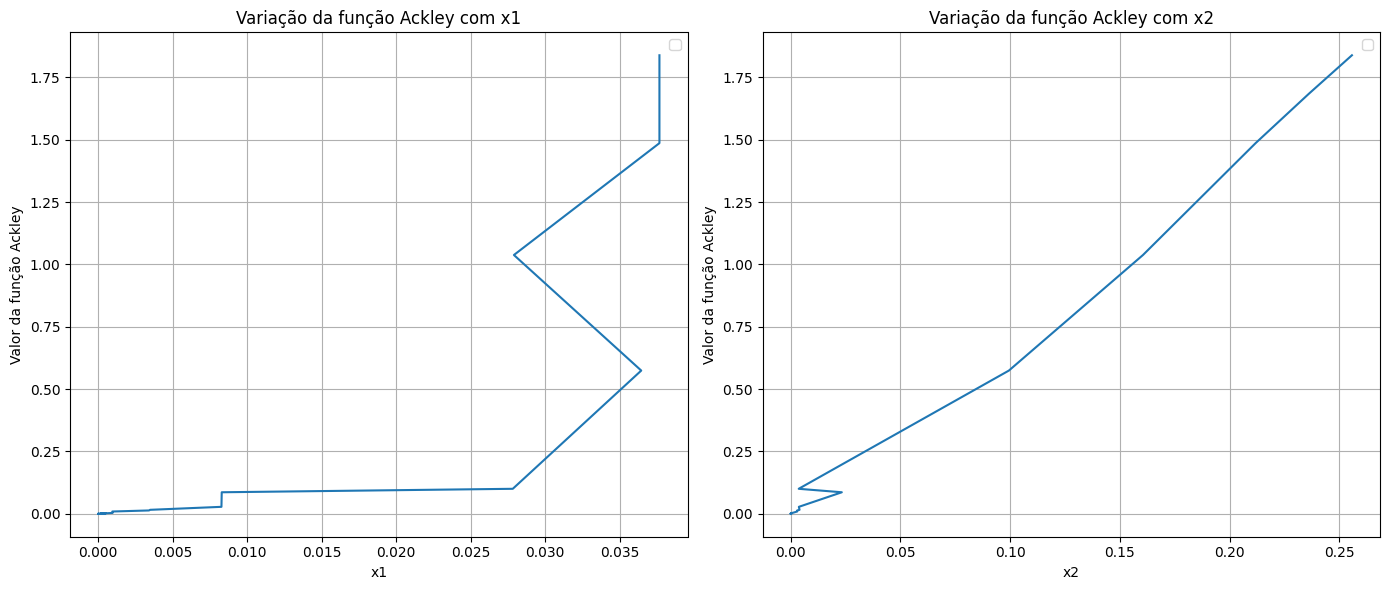

In [25]:
# Plot do gráfico 2D variando x1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(valores_x1, funcao)
plt.title('Variação da função Ackley com x1')
plt.xlabel('x1')
plt.ylabel('Valor da função Ackley')
plt.legend()
plt.grid(True)

# Plot do gráfico 2D variando x2
plt.subplot(1, 2, 2)
plt.plot(valores_x2, funcao)
plt.title('Variação da função Ackley com x2')
plt.xlabel('x2')
plt.ylabel('Valor da função Ackley')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()